In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']

In [2]:
data_zong = pd.read_excel("data.xlsx")

In [3]:
data_zong.head()

时间 地区名称(订单) 装运点/接收点         售达方 名称 2        物料                    描述  \
0  10:01:01    店销-广东    109B  1100121066   杨薇  11070006         梵诗水嫩净透卸妆液80ml   
1  10:01:01    店销-广东    109B  1100121066   杨薇  11010007       E.P.O.深层洁肤霜120g   
2  10:01:01    店销-广东    109B  1100121066   杨薇  11010012  E.P.O.滋颜露－中干性肌肤100ml   
3  10:01:01    店销-广东    109B  1100121066   杨薇  11100003   经典系列水凝冰金保湿修护精华液25ml   
4  10:01:01    店销-广东    109B  1100121066   杨薇  11130001           保湿化妆水1000ml   

   订单数量    含稅金額   BV值  综合BV    SD 凭证       发货日期 销售凭证类型     状态 最高指导者 直接地区督导  \
0    16  2672.0  2032  2032  1256645 2018-12-27   Z102  完全地处理   江东娣   高王广宇   
1     3  1119.0   852   852  1256645 2018-12-27   Z102  完全地处理   江东娣   高王广宇   
2    12  4020.0  3060  3060  1256645 2018-12-27   Z102  完全地处理   江东娣   高王广宇   
3     1   786.0   597   597  1256645 2018-12-27   Z102  完全地处理   江东娣   高王广宇   
4     3  1287.0   978   978  1256645 2018-12-27   Z102  完全地处理   江东娣   高王广宇   

  区域督导     归帐年月  
0  NaN  2019/01  
1  NaN  2019/01  
2  NaN  2019/01  
3  NaN  2019/01  
4  NaN  2019/01

In [4]:
data_zong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019528 entries, 0 to 1019527
Data columns (total 19 columns):
时间          1019528 non-null object
地区名称(订单)    1019528 non-null object
装运点/接收点     1012467 non-null object
售达方         1019528 non-null int64
名称 2        1019337 non-null object
物料          1019528 non-null object
描述          1019528 non-null object
订单数量        1019528 non-null int64
含稅金額        1019528 non-null float64
BV值         1019528 non-null int64
综合BV        1019528 non-null int64
SD 凭证       1019528 non-null int64
发货日期        1019528 non-null datetime64[ns]
销售凭证类型      1019528 non-null object
状态          1019528 non-null object
最高指导者       1019528 non-null object
直接地区督导      1019528 non-null object
区域督导        427166 non-null object
归帐年月        1019528 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(12)
memory usage: 147.8+ MB


## 订单类型：
### Z102 店销网购订单
### Z105 店销赠品订单
### Z106 新店赠品订单
### Z107 店销换货（收回）订单
### Z108 店销换货（换出）订单
### Z109 店销退货订单
### Z110 店销首批购货订单

In [5]:
# 查看所有订单类型
data_zong["销售凭证类型"].value_counts()

Z102    902514
Z110     80809
Z106     24085
Z105      8845
Z109      1943
Z108       707
Z107       625
Name: 销售凭证类型, dtype: int64

In [6]:
# 取出有效列
data = data_zong[["地区名称(订单)", "售达方", "名称 2", "物料", "描述", "订单数量", "含稅金額", "BV值", "综合BV", "SD 凭证", "发货日期",
                 "销售凭证类型"]]

In [7]:
data.head()

地区名称(订单)         售达方 名称 2        物料                    描述  订单数量    含稅金額  \
0    店销-广东  1100121066   杨薇  11070006         梵诗水嫩净透卸妆液80ml    16  2672.0   
1    店销-广东  1100121066   杨薇  11010007       E.P.O.深层洁肤霜120g     3  1119.0   
2    店销-广东  1100121066   杨薇  11010012  E.P.O.滋颜露－中干性肌肤100ml    12  4020.0   
3    店销-广东  1100121066   杨薇  11100003   经典系列水凝冰金保湿修护精华液25ml     1   786.0   
4    店销-广东  1100121066   杨薇  11130001           保湿化妆水1000ml     3  1287.0   

    BV值  综合BV    SD 凭证       发货日期 销售凭证类型  
0  2032  2032  1256645 2018-12-27   Z102  
1   852   852  1256645 2018-12-27   Z102  
2  3060  3060  1256645 2018-12-27   Z102  
3   597   597  1256645 2018-12-27   Z102  
4   978   978  1256645 2018-12-27   Z102

In [8]:
# 发货日期其实就是下单时间，查看下单时间的类型，发现是datetime64类型
data["发货日期"]

0         2018-12-27
1         2018-12-27
2         2018-12-27
3         2018-12-27
4         2018-12-27
             ...    
1019523   2019-10-26
1019524   2019-10-26
1019525   2019-10-26
1019526   2019-10-26
1019527   2019-10-26
Name: 发货日期, Length: 1019528, dtype: datetime64[ns]

In [9]:
# 查看购买商品数量前十的地区
data.groupby("地区名称(订单)")["订单数量"].sum().sort_values(ascending=False).head(10)

地区名称(订单)
店销-上海     575731
店销-广东     531364
店销-湖南     430892
店销-江苏1    320170
店销-江苏2    289108
店销-湖北     276239
店销-北京     265128
店销-杭州     264373
店销-安徽     211083
店销-内蒙古    207652
Name: 订单数量, dtype: int64

### 统计分析：上海、广东、湖南等大区，购买商品的数量较多，这些地区加盟店数量较多，也拥有庞大的客户流量

In [10]:
# 查看交易额前十的地区
data.groupby("地区名称(订单)")["含稅金額"].sum().sort_values(ascending=False).head(10)

地区名称(订单)
店销-上海     144142381.0
店销-广东     124287023.0
店销-湖南     101174031.8
店销-江苏1     75335739.1
店销-湖北      70256538.6
店销-江苏2     67835258.6
店销-杭州      67111752.0
店销-北京      58472550.4
店销-安徽      47770621.2
店销-江西      45686506.9
Name: 含稅金額, dtype: float64

In [11]:
# 绘制饼图来展现地区交易额占比
# 取出交易额前十的地区
price_top10_area = data.groupby("地区名称(订单)")["含稅金額"].sum().sort_values(ascending=False).head(10)

In [12]:
area_name = price_top10_area.index.tolist()

In [13]:
price = price_top10_area.values.tolist()

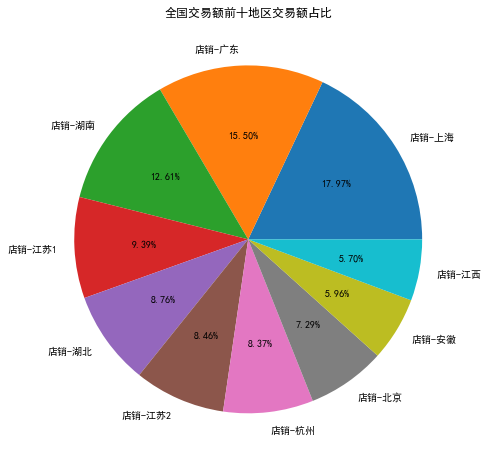

In [14]:
# 绘制饼图
mp.figure(figsize=(12, 8))
mp.title("全国交易额前十地区交易额占比")
mp.pie(price, labels=area_name, autopct='%.2f%%')
mp.show()

### 统计分析：上海交易额最大，因为购买数量大，交易额自然增大。除此之外，广东、湖南、江苏也是主要消费地区

In [15]:
# 查看哪月销量最好
data.groupby("发货日期")["订单数量"].sum().sort_values(ascending=False).head(10)

发货日期
2019-09-25    140449
2019-06-25    120727
2019-07-25    114782
2019-04-25    111100
2019-03-25    104917
2019-10-25    103813
2019-05-25    100006
2019-09-27     95959
2019-01-25     80326
2019-02-25     76876
Name: 订单数量, dtype: int64

### 统计分析：9月25号月结的时候订单最多，可能和今年第一次上“四大金刚”活动有关

In [16]:
# 计算客单价
# 总价
sumPrice = data["含稅金額"].sum()
# 订单数
countID = data["SD 凭证"].count()
avgPrice = sumPrice / countID
print(avgPrice)

1242.9156707809889


In [17]:
# 用户消费行为分析
customer_behavior = data.groupby("售达方").agg({
    "SD 凭证":"nunique",
    "订单数量":"sum",
    "含稅金額":"sum"
}).describe()

In [18]:
customer_behavior

SD 凭证         订单数量          含稅金額
count  4709.000000  4709.000000  4.709000e+03
mean     16.066681  1159.388193  2.690990e+05
std      10.415610   815.487877  2.064888e+05
min       1.000000    -5.000000 -3.580000e+03
25%       9.000000   632.000000  1.359520e+05
50%      14.000000  1013.000000  2.193420e+05
75%      21.000000  1526.000000  3.761080e+05
max     182.000000  8068.000000  2.153048e+06

In [19]:
customer_behavior["含稅金額"] = customer_behavior["含稅金額"].astype("int64")

In [20]:
customer_behavior

SD 凭证         订单数量     含稅金額
count  4709.000000  4709.000000     4709
mean     16.066681  1159.388193   269099
std      10.415610   815.487877   206488
min       1.000000    -5.000000    -3580
25%       9.000000   632.000000   135952
50%      14.000000  1013.000000   219342
75%      21.000000  1526.000000   376108
max     182.000000  8068.000000  2153048

## 用户行为总结：
### 用户平均消费次数为16次，最低消费次数为1次，最高的甚至消费次数高达182次，属于产品的忠实客户
### 用户平均消费金额为26.9万，75%的用户消费金额为37.6万，消费金额加大，属于非常有价值的用户，可以重点关注

In [21]:
# 查看消费次数最多前10个店编
data.pivot_table(index="售达方", values="SD 凭证", aggfunc="nunique").sort_values(by="SD 凭证", ascending=False).head(10)

SD 凭证  售达方
售达方                   
1100121886    182    1
1100121649     91    1
1100064091     85    1
1100123074     72    1
1100120239     69    1
1100121928     67    1
1100121704     66    1
1100122204     66    1
1100121140     66    1
1100121333     65    1

In [22]:
# 查看消费金额最多的前10个店编
data.pivot_table(index="售达方", values="含稅金額", aggfunc="sum").sort_values(by="含稅金額", ascending=False).head(10)

含稅金額
售达方                  
1100123074  2153048.0
1100121886  1862174.7
1100121928  1637216.4
1100045832  1632747.0
1100122206  1601369.0
1100122204  1568479.4
1100122176  1502688.0
1100121704  1499961.4
1100044654  1499901.4
1100120940  1486573.7

In [23]:
# 查看积分最多的前10个店编
data.pivot_table(index="售达方", values="BV值", aggfunc="sum").sort_values(by="BV值", ascending=False).head(10)

BV值
售达方                
1100123074  1597993
1100121886  1388314
1100121928  1222249
1100045832  1190732
1100122204  1172177
1100122206  1167515
1100121704  1110006
1100122176  1104579
1100120940  1094588
1100044654  1087869

### 小结：基本上购买金额较多的店编，积分也会较高

In [24]:
# 查看哪个产品销量最多
product_top_15 = data.pivot_table(index="描述", values="订单数量", aggfunc="sum").sort_values(by="订单数量", ascending=False).head(15)

In [25]:
product_top_15

订单数量
描述                      
中包装袋（新）           877884
E.P.O.深层保养面霜40g   239955
蛋白霜30g            210293
怡肌霜30g            163377
顾客资料手册2017        152698
E.P.O.洁容霜140g     150459
梵诗水嫩净透卸妆液80ml     143165
日常护理步骤            136870
价外费用              136267
E.P.O.深层洁肤霜50g    115624
润肤11乳液120ml       112606
E.P.O.洁容霜50g      109832
梵诗玫瑰化妆水-轻活型180ml  102071
胚芽伊油120ml          96280
E.P.O.深层洁肤霜120g    88200

In [26]:
# 因为中包袋、顾客资料手册、日常护理步骤、价外费用（运费）属于辅销品，所以排除
product_top_10 = product_top_15.drop(labels=["中包装袋（新）", "顾客资料手册2017", "日常护理步骤",
                                             "价外费用", "E.P.O.深层洁肤霜120g"])

In [27]:
product_top_10

订单数量
描述                      
E.P.O.深层保养面霜40g   239955
蛋白霜30g            210293
怡肌霜30g            163377
E.P.O.洁容霜140g     150459
梵诗水嫩净透卸妆液80ml     143165
E.P.O.深层洁肤霜50g    115624
润肤11乳液120ml       112606
E.P.O.洁容霜50g      109832
梵诗玫瑰化妆水-轻活型180ml  102071
胚芽伊油120ml          96280

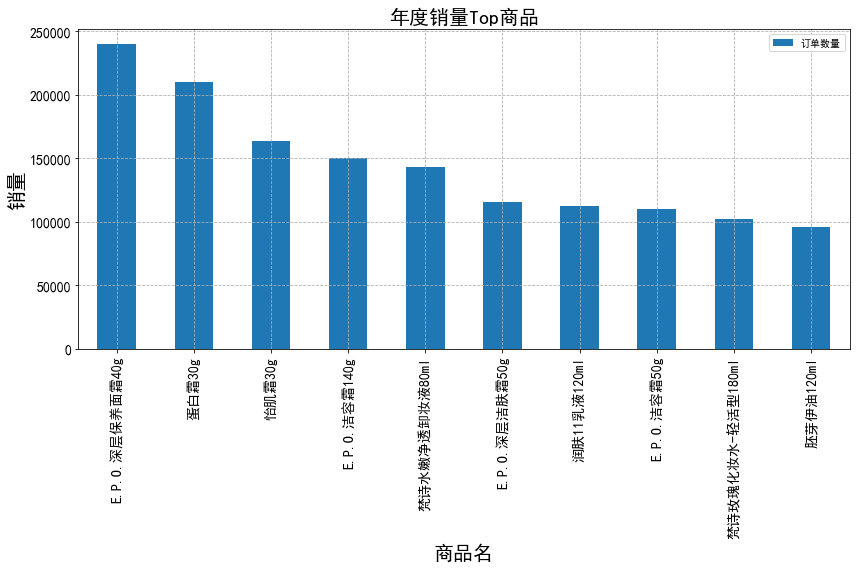

In [28]:
# 绘图
product_top_10.plot.bar(figsize=(12, 8), fontsize=14)
mp.grid(linestyle="--")
mp.title("年度销量Top商品", fontsize=20)
mp.xlabel("商品名", fontsize=20)
mp.ylabel("销量", fontsize=20)
mp.tight_layout()
mp.show()

### 小结：深层保养面霜、蛋白霜、怡肌霜这些卖的最好，可能跟举办测肤活动需要用到这些产品有关

In [29]:
# 获取全年深保的数据
data_shenbao = data[data["描述"] == "E.P.O.深层保养面霜40g"]

In [30]:
# 查看深保的全年销量
data_shenbao_sales = data_shenbao.pivot_table(index=["发货日期"], values=["描述", "订单数量"], aggfunc="sum")

In [31]:
data_shenbao_sales

订单数量
发货日期             
2018-12-27  14494
2018-12-28   5301
2018-12-29   2722
2018-12-30    972
2018-12-31    781
...           ...
2019-10-22    994
2019-10-23   1126
2019-10-24   1848
2019-10-25   4355
2019-10-26    712

[295 rows x 1 columns]

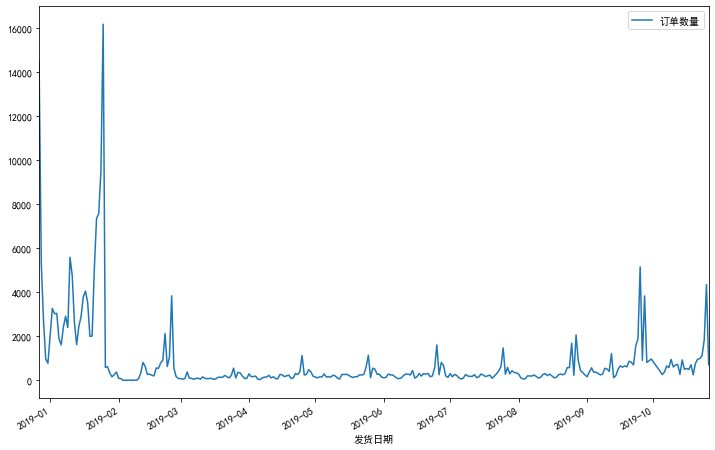

In [32]:
data_shenbao_sales.plot(figsize=(12, 8))

### 统计分析：可见深层保养面霜1月和2月销量不错，可以在这两个月多备库存

In [33]:
data["售达方"].dtype

dtype('int64')

In [34]:
# 查看全年下单次数最多的店编的数据
order_max = data[data["售达方"] == 1100121886]

In [35]:
order_max

地区名称(订单)         售达方 名称 2        物料                      描述  订单数量  \
999       店销-黑龙江  1100121886  王清涛    840084            自由礼盒2018版（大）     1   
1000      店销-黑龙江  1100121886  王清涛    810120            精装版护理手册2018版     1   
1001      店销-黑龙江  1100121886  王清涛  11160001              怡丝润发乳600ml     1   
1002      店销-黑龙江  1100121886  王清涛  11010007         E.P.O.深层洁肤霜120g     1   
1003      店销-黑龙江  1100121886  王清涛    111716                城市防护乳50g     2   
...          ...         ...  ...       ...                     ...   ...   
1010216   店销-黑龙江  1100121886  王清涛  11030053             润肤11乳液120ml     2   
1010217   店销-黑龙江  1100121886  王清涛  11030052               胚芽伊油120ml     2   
1010218   店销-黑龙江  1100121886  王清涛  11030050                  蛋白霜30g     2   
1010219   店销-黑龙江  1100121886  王清涛   6SE0250                    价外费用     8   
1010797   店销-黑龙江  1100121886  王清涛  12J30192  百奥维他 碧莱特复合果蔬汁饮料30ml*10     3   

          含稅金額  BV值  综合BV    SD 凭证       发货日期 销售凭证类型  
999        0.0    0     0  1256725 2018-12-27   Z102  
1000       0.0    0     0  1256725 2018-12-27   Z102  
1001      59.0   11    11  1256726 2018-12-27   Z102  
1002     373.0  284   284  1256726 2018-12-27   Z102  
1003     334.0  254   254  1256726 2018-12-27   Z102  
...        ...  ...   ...      ...        ...    ...  
1010216    0.0    0     0  1402773 2019-09-27   Z105  
1010217    0.0    0     0  1402773 2019-09-27   Z105  
1010218    0.0    0     0  1402773 2019-09-27   Z105  
1010219    0.0    0     0  1402773 2019-09-27   Z105  
1010797    0.0    0     0  1411382 2019-10-11   Z105  

[1779 rows x 12 columns]

In [36]:
# 看看这家最感兴趣的10个商品
order_max.groupby("描述")["订单数量"].sum().sort_values(ascending=False).head(10)

描述
中包装袋（新）                   1318
蛋白霜30g                     469
E.P.O.深层保养面霜40g            364
怡肌霜30g                     362
梵诗水嫩净透卸妆液80ml              294
E.P.O.洁容霜140g              241
梵诗玫瑰化妆水-轻活型180ml           192
百奥维他 碧莱特复合果蔬汁饮料30ml*10     192
E.P.O.洁容霜50g               181
萃丽莹润化妆水50ml（00666）         165
Name: 订单数量, dtype: int64

### 用户分析：可以向这位店家多推送以上产品的活动信息、何时到货、产品特色等

## 根据用户购买商品的数量和金额，对用户进行分类

In [37]:
data.head()

地区名称(订单)         售达方 名称 2        物料                    描述  订单数量    含稅金額  \
0    店销-广东  1100121066   杨薇  11070006         梵诗水嫩净透卸妆液80ml    16  2672.0   
1    店销-广东  1100121066   杨薇  11010007       E.P.O.深层洁肤霜120g     3  1119.0   
2    店销-广东  1100121066   杨薇  11010012  E.P.O.滋颜露－中干性肌肤100ml    12  4020.0   
3    店销-广东  1100121066   杨薇  11100003   经典系列水凝冰金保湿修护精华液25ml     1   786.0   
4    店销-广东  1100121066   杨薇  11130001           保湿化妆水1000ml     3  1287.0   

    BV值  综合BV    SD 凭证       发货日期 销售凭证类型  
0  2032  2032  1256645 2018-12-27   Z102  
1   852   852  1256645 2018-12-27   Z102  
2  3060  3060  1256645 2018-12-27   Z102  
3   597   597  1256645 2018-12-27   Z102  
4   978   978  1256645 2018-12-27   Z102

In [38]:
# 删除退换货的订单，生成有效订单
valid_data = data[data["售达方"] > 1100000000]

In [39]:
# 取出订单数量和含税金额
price_count = valid_data.pivot_table(index=["售达方"], values=["订单数量", "含稅金額"], aggfunc="sum")

In [40]:
price_count

含稅金額  订单数量
售达方                       
1100005183  277287.0  1052
1100005303  402849.0  1337
1100005386  406072.0  1698
1100005406  411865.0  1955
1100005435  427256.0  1628
...              ...   ...
1100123973   65361.0   683
1100123974  124718.0   405
1100123975  135135.0   395
1100123977   65960.0   195
1100123979   65123.0   707

[4628 rows x 2 columns]

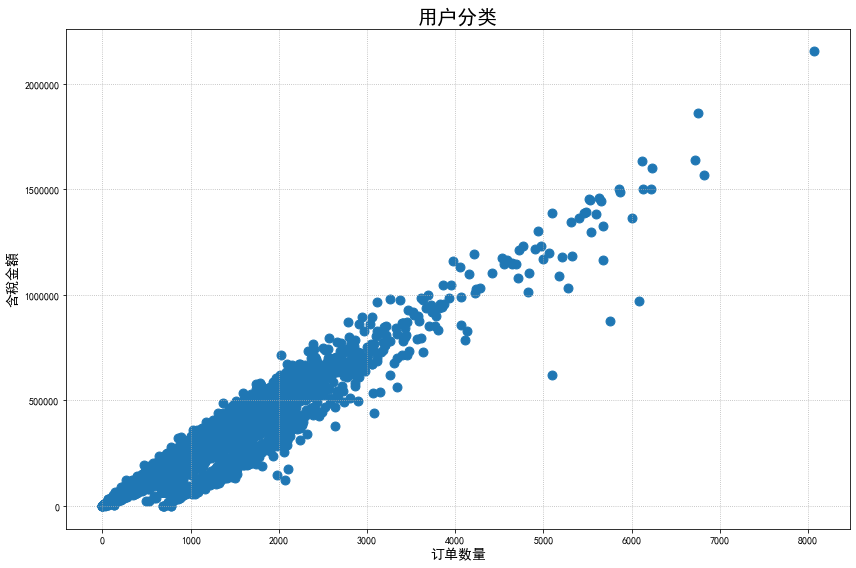

In [41]:
# 看看含税金额和订单数量组成的这些点的分布情况
mp.figure(figsize=(12, 8))
mp.title("用户分类", fontsize=20)
mp.xlabel("订单数量", fontsize=14)
mp.ylabel("含稅金額", fontsize=14)
mp.grid(linestyle=":")
x = np.array(price_count["订单数量"]).reshape(-1, 1)
y = np.array(price_count["含稅金額"])
mp.scatter(x, y, s=80)
mp.tight_layout()
mp.show()

In [42]:
import sklearn.cluster as sc

In [43]:
# 建立聚类模型，将用户分为4类
model = sc.KMeans(n_clusters=4)
# 训练模型
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
# 预测
pred_y = model.labels_

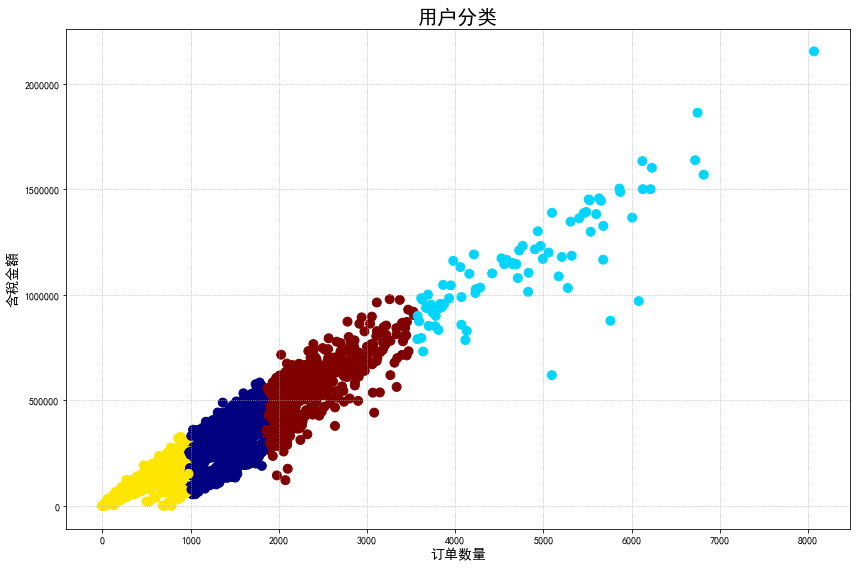

In [45]:
# 绘图
mp.figure(figsize=(12, 8))
mp.title("用户分类", fontsize=20)
mp.xlabel("订单数量", fontsize=14)
mp.ylabel("含稅金額", fontsize=14)
mp.grid(linestyle=":")
x = np.array(price_count["订单数量"]).reshape(-1, 1)
y = np.array(price_count["含稅金額"])
mp.scatter(x, y, c=pred_y, cmap="jet", s=80)
mp.tight_layout()
mp.show()

### 由此可发现，全年消费金额大于100万的高消费门店占少数，绝大多数集中在50万~100万之间